In [ ]:
# Libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

# This we see is other method of imputing values, but give a warning for too much iterations, so we think that the other methods are better
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


In [ ]:
##############
# CONSIGNA 3 #
##############
"""
Realizar un análisis descriptivo, que ayude a la comprensión del problema, de cada una de las variables involucradas en el problema detallando características, comportamiento y rango de variación.
Debe incluir:
Análisis y decisión sobre datos faltantes.
Visualización de datos (por ejemplo histogramas, scatterplots entre variables, diagramas de caja)
Codificación de variables categóricas (si se van a utilizar para predicción).
Matriz de correlación de variables.
Estandarización o escalado de datos.
Validación cruzada train - test. Realizar una división del conjunto de datos en conjuntos de entrenamiento y prueba (y si se quiere, se puede incluir validación, que luego será útil) en el MOMENTO donde ustedes lo crean adecuado.
"""

'\nRealizar un análisis descriptivo, que ayude a la comprensión del problema, de cada una de las variables involucradas en el problema detallando características, comportamiento y rango de variación.\nDebe incluir:\nAnálisis y decisión sobre datos faltantes.\nVisualización de datos (por ejemplo histogramas, scatterplots entre variables, diagramas de caja)\nCodificación de variables categóricas (si se van a utilizar para predicción).\nMatriz de correlación de variables.\nEstandarización o escalado de datos.\nValidación cruzada train - test. Realizar una división del conjunto de datos en conjuntos de entrenamiento y prueba (y si se quiere, se puede incluir validación, que luego será útil) en el MOMENTO donde ustedes lo crean adecuado.\n'

The amount of missing data in the columns is:
CRIM       23
ZN         22
INDUS      15
CHAS       23
NOX        24
RM         21
AGE        24
DIS        15
RAD        28
TAX        18
PTRATIO    28
B          22
LSTAT      22
MEDV       21
dtype: int64


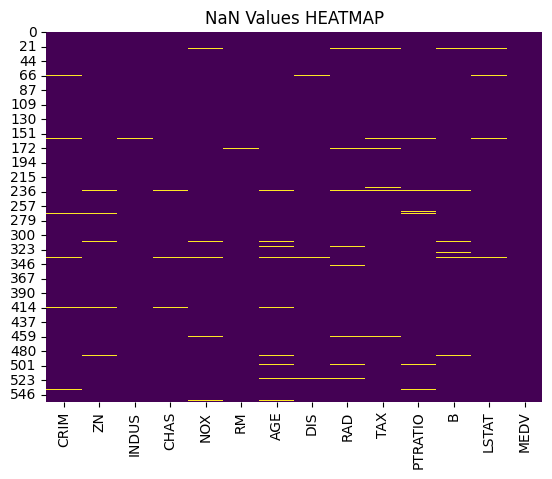

In [ ]:
# Opening of dataset, remove of NaN in y column, and heatmap of NaN values

house_prices = pd.read_csv("/content/house-prices-tp.csv")

# Sum of missing data for each column
house_sum_null = house_prices.isnull().sum()
print('The amount of missing data in the columns is:')
print(house_sum_null)

# Remove rows with NaN from the MEDV column
house_prices = house_prices.dropna(subset=['MEDV'])

# Missing data
sns.heatmap(house_prices.isnull(), cbar=False, cmap='viridis')
plt.title('NaN Values HEATMAP')
plt.show()

In [ ]:
# We perform the division between the columns with data and the column to predict.
X = house_prices.drop('MEDV', axis=1)
y = house_prices['MEDV']

# We split our dataset into two parts, the training part and the testing part.
# The division is done in an 80/20 ratio.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=42)

HISTOGRAM



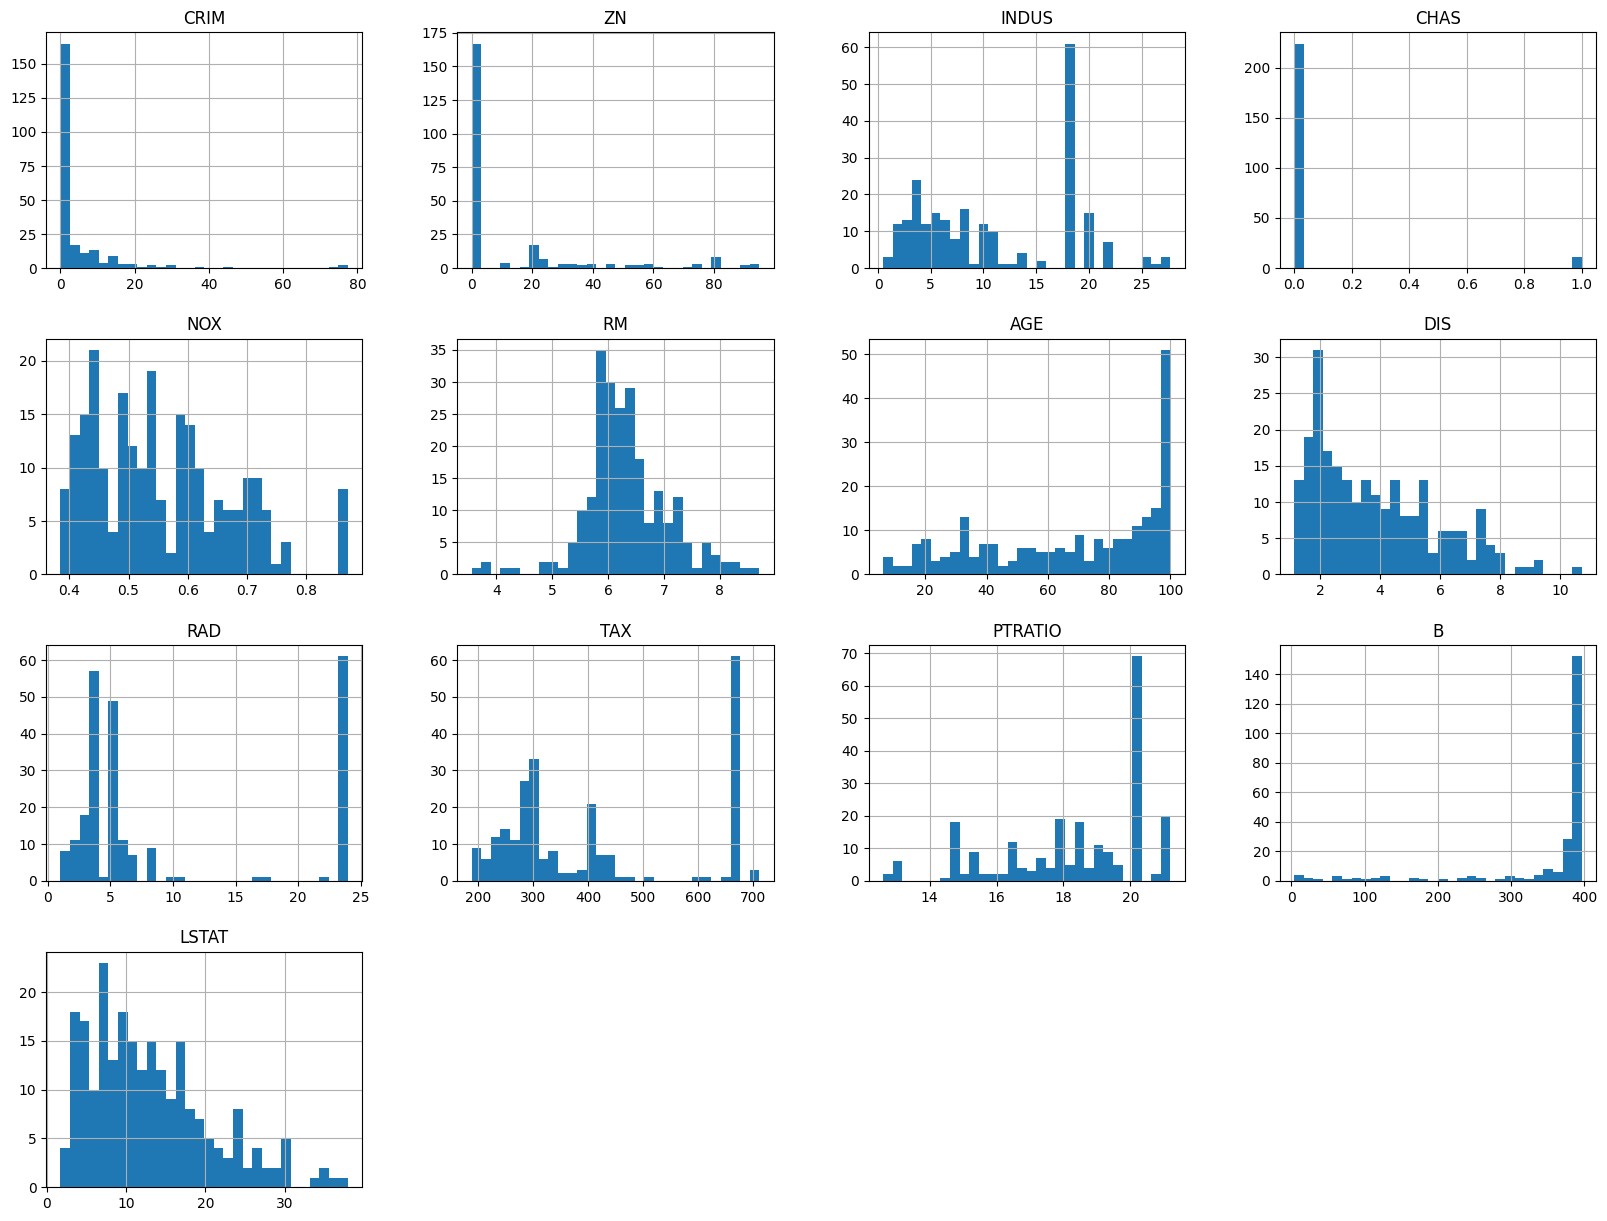


PAIRPLOT



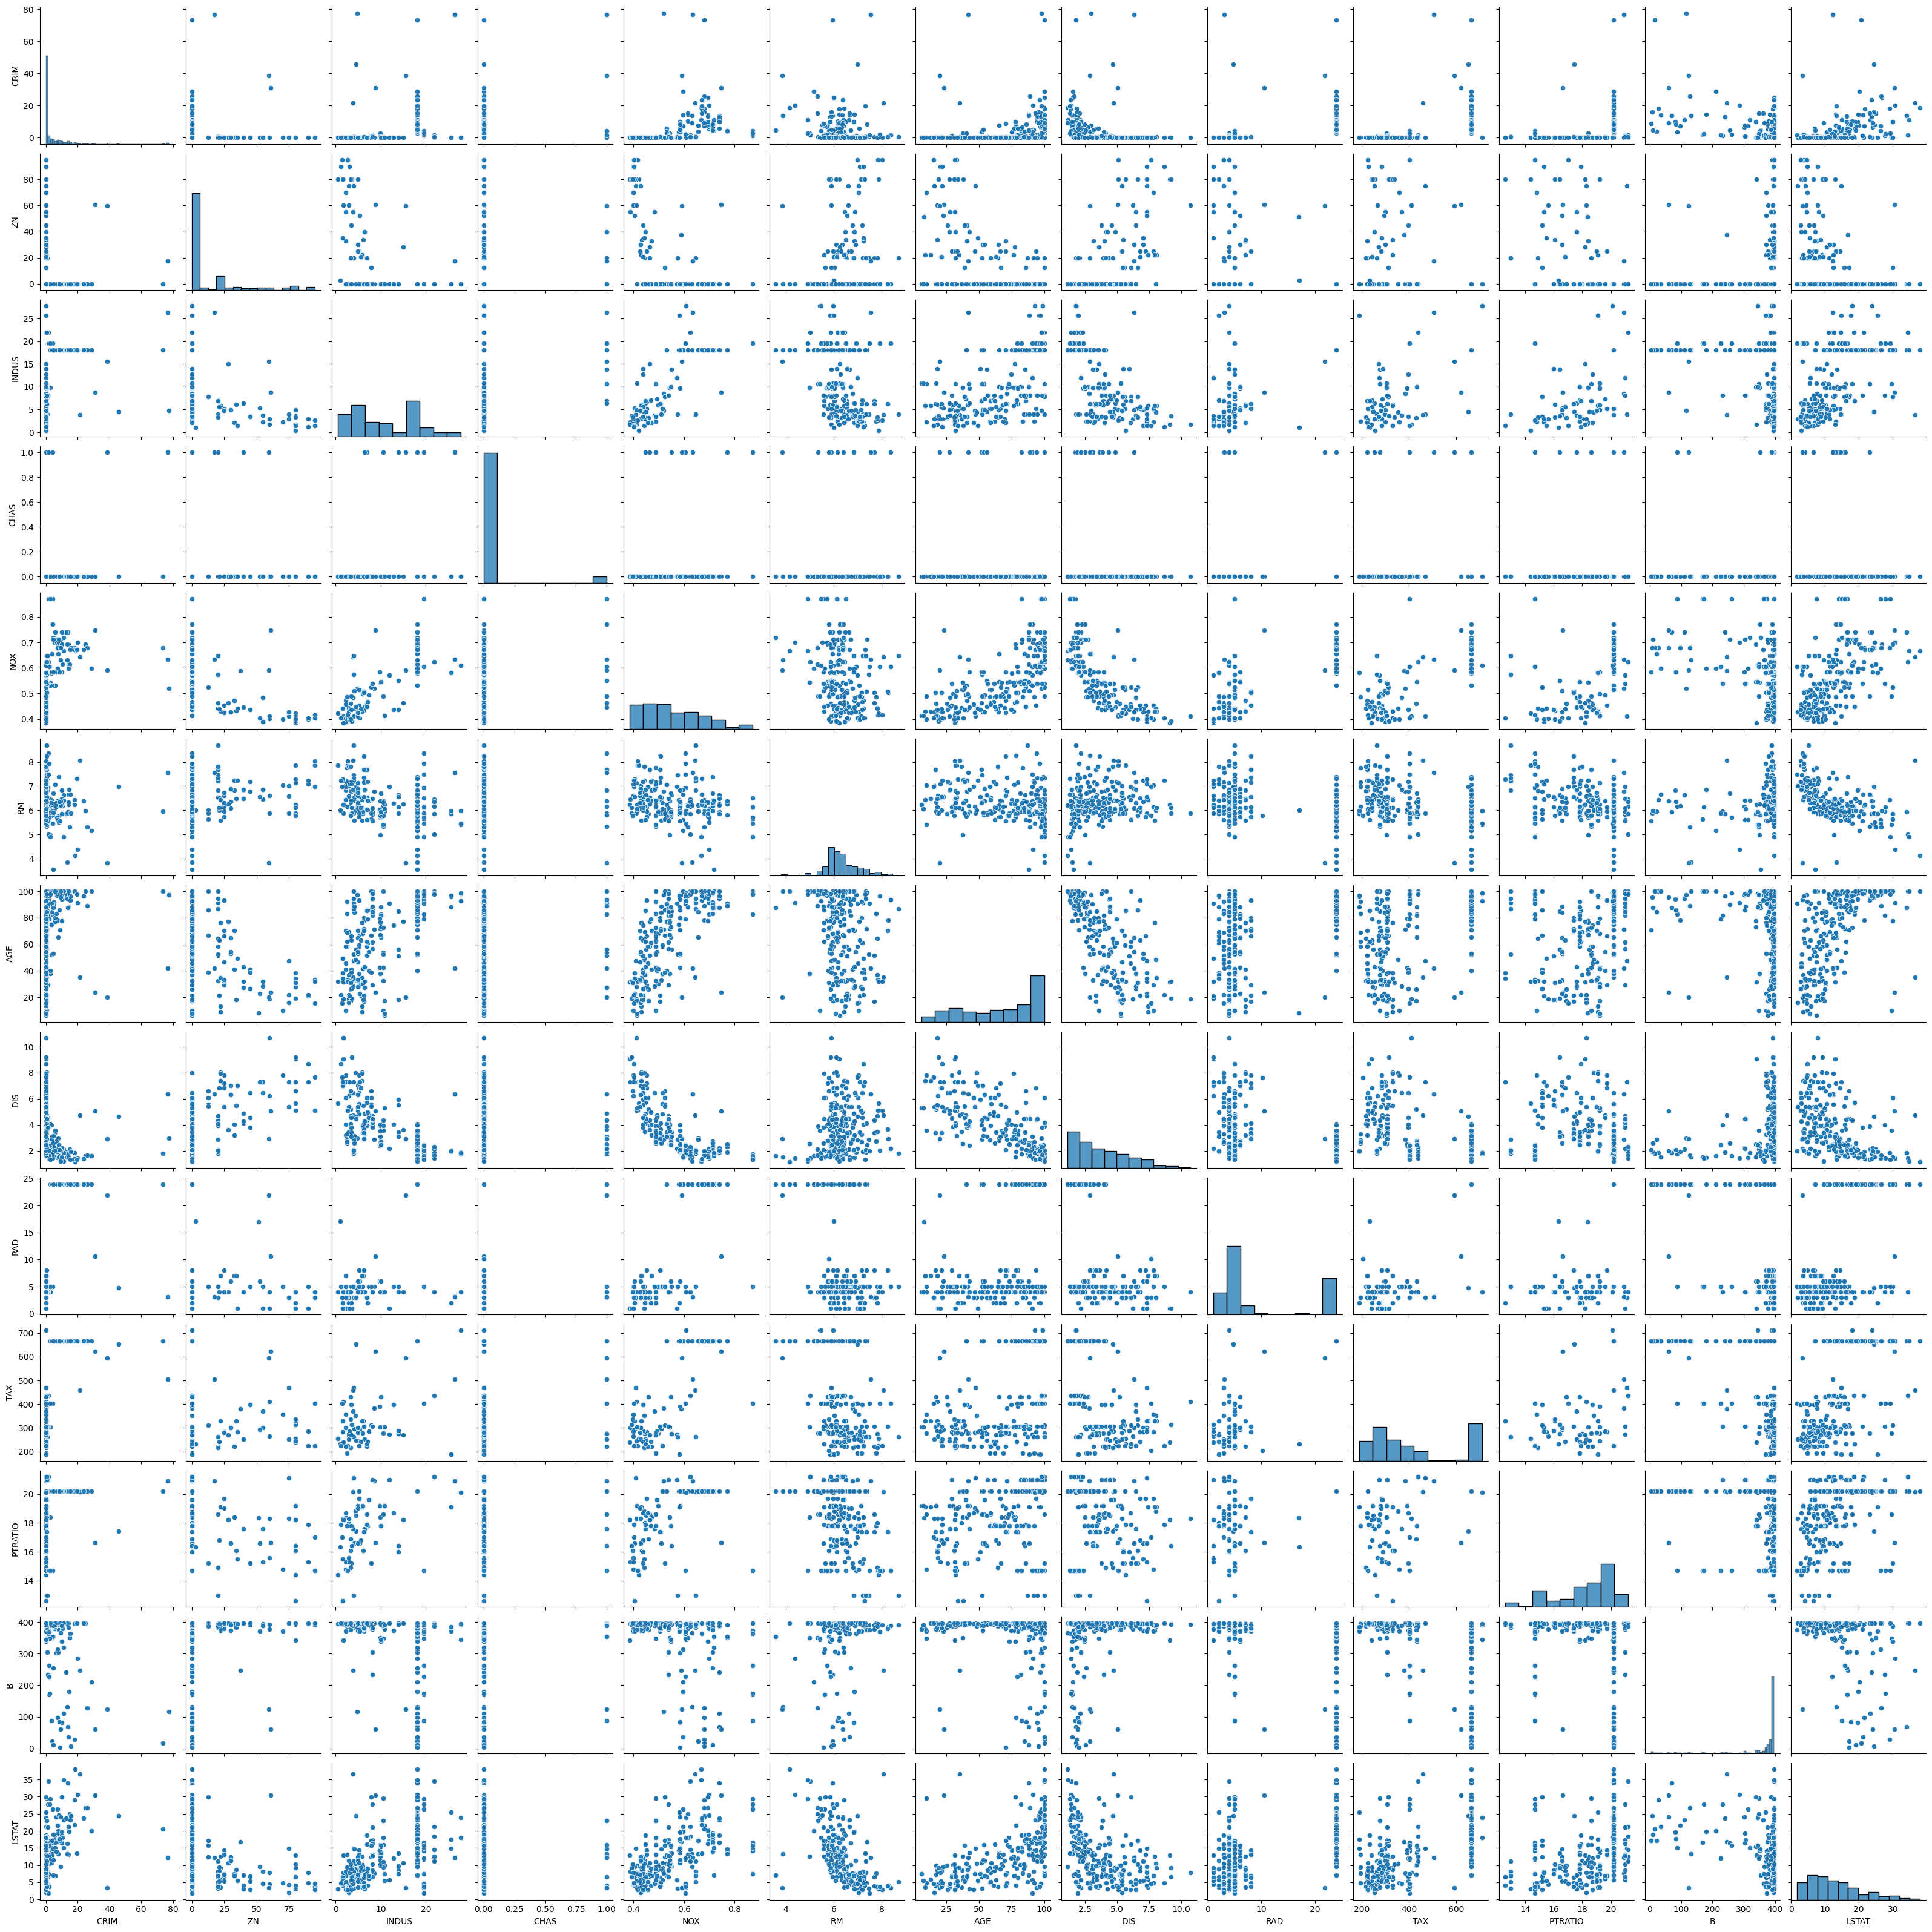


BOXPLOT



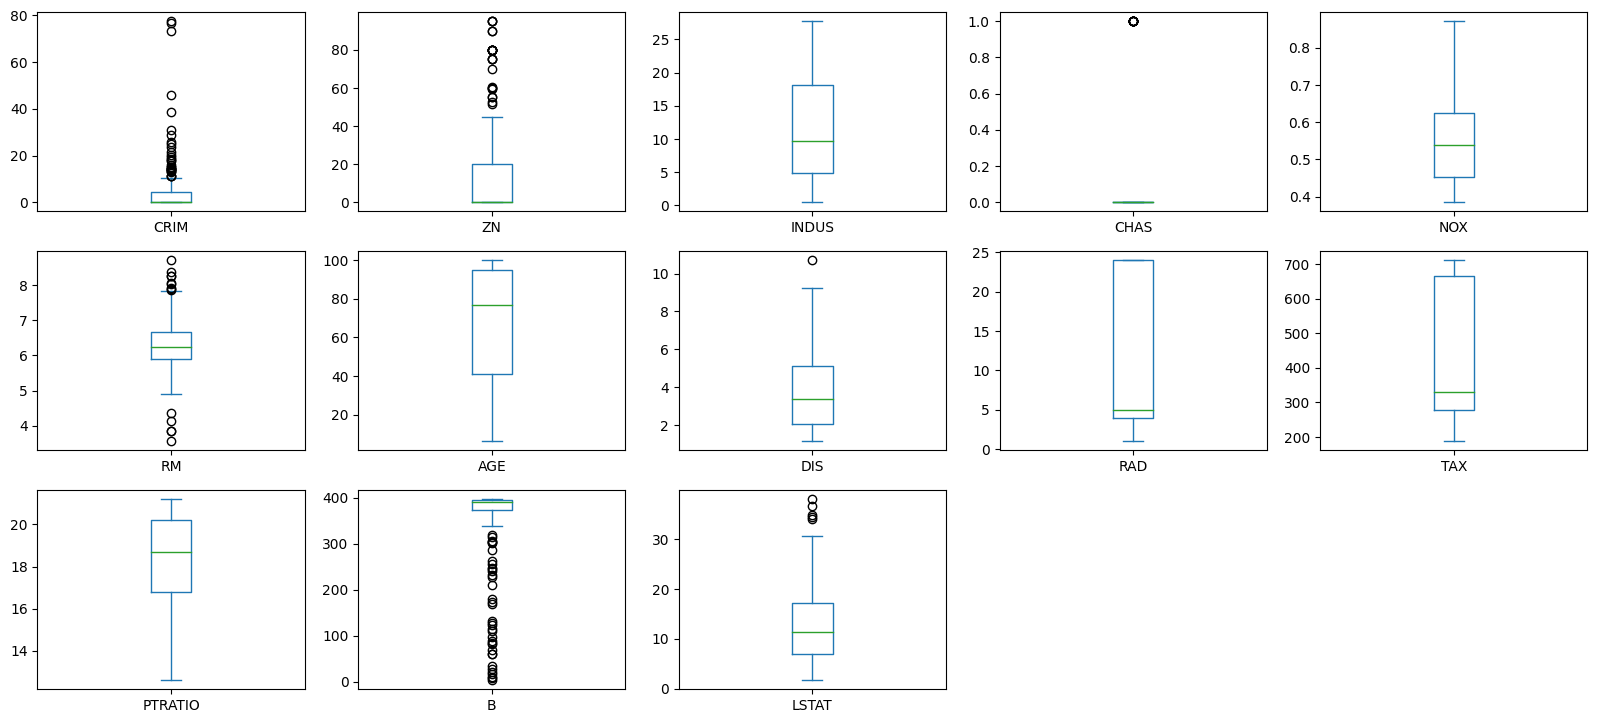

In [ ]:
# Histogram of each variable except MEDV
print('HISTOGRAM')
print('')
X_train.hist(bins=30, figsize=(20, 15))
plt.show()

# We create scatter plots between the variables excluding MEDV.
print('')
print('PAIRPLOT')
print('')
sns.pairplot(X_train)
plt.show()

# Boxplot for each of the columns except for the MEDV column.
print('')
print('BOXPLOT')
print('')
X_train.plot(kind='box', subplots=True, layout=(5,5), figsize=(20, 15))
plt.show()

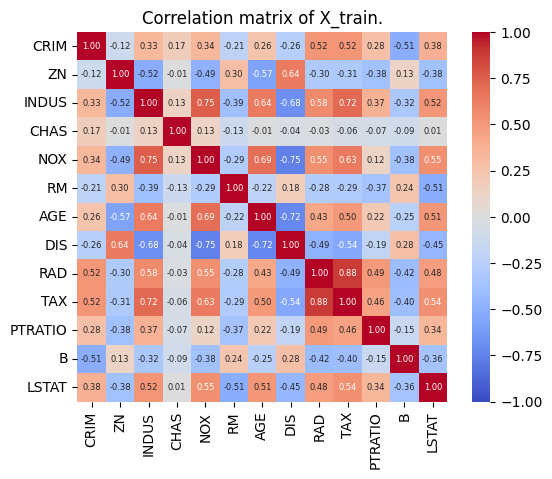

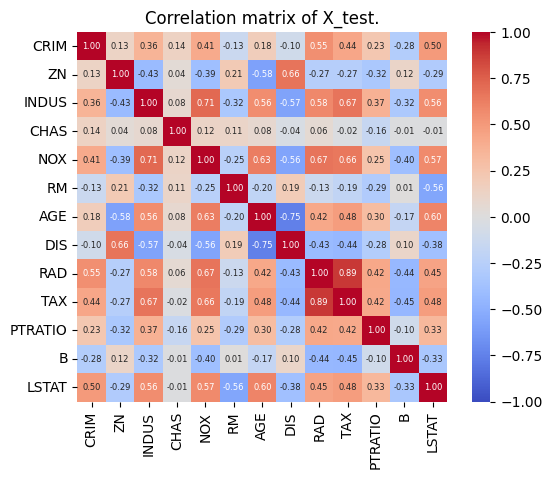

In [ ]:
# We show the positive, negative, or no relationship between the columns of X_train and X_test.
corr_train = X_train.corr()
corr_test = X_test.corr()
sns.heatmap(corr_train, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0,square=True,fmt='.2f',annot_kws = {'size': 6})
plt.title('Correlation matrix of X_train.')
plt.show()
sns.heatmap(corr_test, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0,square=True,fmt='.2f',annot_kws = {'size': 6})
plt.title('Correlation matrix of X_test.')
plt.show()

In [ ]:
def mean_method(X_train=X_train,X_test=X_test):
    # Use of the standard scaler
  scaler = StandardScaler()
  X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
  X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

  # Imputation of missing values "MEAN METHOD", SimpleImputer
  imputer = SimpleImputer(strategy='mean')
  X_train_scaled = imputer.fit_transform(X_train_scaled)
  X_test_scaled = imputer.transform(X_test_scaled)

  return X_train_scaled , X_test_scaled

In [ ]:
def iterative_method(X_train=X_train,X_test=X_test):
  # Imputation of missing values, "ITERATIVE IMPUTER METHOD", this get a convergence warning.

  # Imputer's creation
  iterative_imputer = IterativeImputer()

  # Imputation in train and test
  X_train_imputed = iterative_imputer.fit_transform(X_train)
  X_test_imputed = iterative_imputer.transform(X_test)

  # Standarization
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train_imputed)
  X_test_scaled = scaler.transform(X_test_imputed)
  return X_train_scaled , X_test_scaled

In [ ]:
def KNN_method(X_train=X_train,X_test=X_test):
  # Imputation of missing values, "KNN METHOD"

  knn_imputer = KNNImputer(n_neighbors=5, weights='uniform')

  # Imputation with KNN
  X_train_imputed = knn_imputer.fit_transform(X_train)
  X_test_imputed = knn_imputer.transform(X_test)

  # Data standarization
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train_imputed)
  X_test_scaled = scaler.transform(X_test_imputed)
  return X_train_scaled , X_test_scaled

In [ ]:
def mixed_method(X_train=X_train,X_test=X_test):
  # Imputation of missing values, "MIXED METHOD", values with statistics imputation (SimpleImputer) and KNN at other variables

  # Statitics criterion of each variable
  columns_mean = ['NOX', 'RM']
  columns_median = ['DIS', 'LSTAT']
  columns_mode = ['CRIM', 'ZN', 'CHAS','AGE', 'PTRATIO', 'B']
  columns_knn = ['INDUS', 'RAD', 'TAX']

  # Create of imputer
  imputer_mean = SimpleImputer(strategy='mean')
  imputer_median = SimpleImputer(strategy='median')
  imputer_mode = SimpleImputer(strategy='most_frequent')
  imputer_knn = KNNImputer(n_neighbors=5)

  # Create of ColumnTransformer
  preprocessor = ColumnTransformer(
      transformers=[
          ('mean', imputer_mean, columns_mean),
          ('median', imputer_median, columns_median),
          ('mode', imputer_mode, columns_mode),
          ('knn', imputer_knn, columns_knn)
      ],
      remainder='passthrough'
      # Leave other column without changes It's not necesary because we use all columns
  )

  # pipeline creation
  pipeline = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('scaler', StandardScaler())
  ])

  # apply of pipeline in train/test
  X_train_scaled = pipeline.fit_transform(X_train)
  X_test_scaled = pipeline.transform(X_test)
  return X_train_scaled , X_test_scaled

In [ ]:
X_train_scaled , X_test_scaled = mean_method()

In [ ]:
X_train_scaled , X_test_scaled = iterative_method()

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [ ]:
X_train_scaled , X_test_scaled = KNN_method()

In [ ]:
X_train_scaled , X_test_scaled = mixed_method()

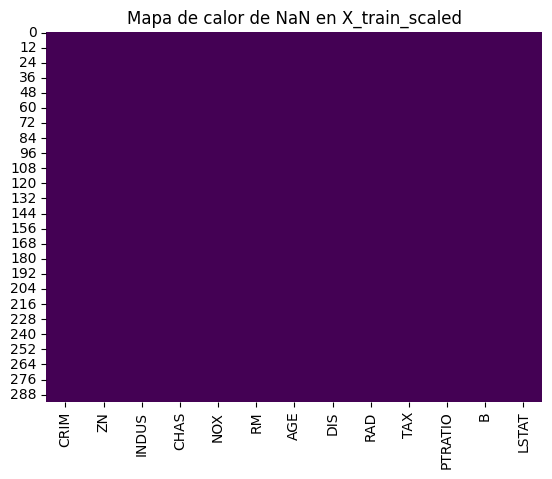

In [ ]:
# transform X_train_scaled to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# NaN heatmap after imputation
sns.heatmap(X_train_scaled_df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de calor de NaN en X_train_scaled')
plt.show()

In [ ]:
##############
# CONSIGNA 4 #
##############
"""
Implementar la solución del problema de regresión con regresión lineal múltiple.
Probar con el método LinearRegression.
Probar con métodos de gradiente descendiente. ¿Algún cambio? Incorporar gráficas de Error vs Iteraciones (loss vs epochs). Agregar comentarios.
Probar con métodos de regularización (Lasso, Ridge, Elastic Net).
Obtener las métricas adecuadas (entre R2 Score, MSE, RMSE, MAE, MAPE, elegir) tanto para entrenamiento como para prueba. ¿Por qué para ambos conjuntos?
¿Creen que han conseguido un buen fitting?
"""

'\nImplementar la solución del problema de regresión con regresión lineal múltiple.\nProbar con el método LinearRegression.\nProbar con métodos de gradiente descendiente. ¿Algún cambio? Incorporar gráficas de Error vs Iteraciones (loss vs epochs). Agregar comentarios.\nProbar con métodos de regularización (Lasso, Ridge, Elastic Net).\nObtener las métricas adecuadas (entre R2 Score, MSE, RMSE, MAE, MAPE, elegir) tanto para entrenamiento como para prueba. ¿Por qué para ambos conjuntos?\n¿Creen que han conseguido un buen fitting?\n'

In [ ]:
# Linear Regression model

# Linear Regression model creation
linear_model = LinearRegression()

# Training model
linear_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = linear_model.predict(X_train_scaled)
y_test_pred = linear_model.predict(X_test_scaled)

# Metrics MSE and R square
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Train MSE: {train_mse}, Test MSE: {test_mse}')
print(f'Train R2: {train_r2}, Test R2: {test_r2}')

# Obtain the coefficients of the model
coefficients = linear_model.coef_
intercept = linear_model.intercept_

print("Model coefficients:", coefficients)
print("Model intercept:", intercept)

Train MSE: 33.49692374037231, Test MSE: 38.171484520550344
Train R2: 0.6535450584461434, Test R2: 0.5321229315351463
Model coefficients: [ 0.28183942  1.61413064  0.22100809  1.36098834 -1.67385844  2.59234133
 -1.95155157 -4.09429703  2.00497888 -2.22812045 -2.25898014  0.2077862
 -3.60196282]
Model intercept: 22.920249306710613


In [ ]:
# SGDRegressor Model

# Creation of the model
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3)

# Training of the model
sgd_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_sgd = sgd_model.predict(X_train_scaled)
y_test_pred_sgd = sgd_model.predict(X_test_scaled)

# Metrics
train_mse_sgd = mean_squared_error(y_train, y_train_pred_sgd)
test_mse_sgd = mean_squared_error(y_test, y_test_pred_sgd)
train_r2_sgd = r2_score(y_train, y_train_pred_sgd)
test_r2_sgd = r2_score(y_test, y_test_pred_sgd)

print(f'Train MSE (SGD): {train_mse_sgd}, Test MSE (SGD): {test_mse_sgd}')
print(f'Train R2 (SGD): {train_r2_sgd}, Test R2 (SGD): {test_r2_sgd}')

# Obtain the coefficients of the model
coefficients = sgd_model.coef_
intercept = sgd_model.intercept_

print("Model coefficients:", coefficients)
print("Model intercept:", intercept)

Train MSE (SGD): 33.5460424761945, Test MSE (SGD): 38.26669382014687
Train R2 (SGD): 0.6530370288467576, Test R2 (SGD): 0.5309559282460332
Model coefficients: [ 0.26851293  1.5517113  -0.01895175  1.42260587 -1.61778128  2.57793375
 -1.93729002 -4.03723825  1.58820635 -1.71729388 -2.24524602  0.21314025
 -3.64719362]
Model intercept: [22.92603419]


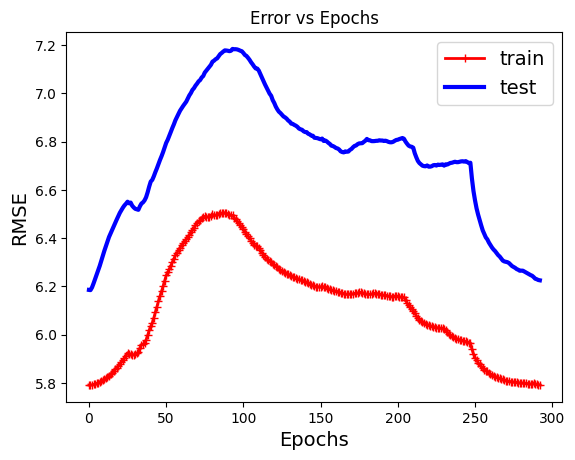

In [ ]:
# History error
train_errors, test_errors = [], []
for m in range(1, len(X_train_scaled)):
    sgd_model.partial_fit(X_train_scaled[:m], y_train[:m])
    y_train_predict = sgd_model.predict(X_train_scaled)
    y_test_predict = sgd_model.predict(X_test_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    test_errors.append(mean_squared_error(y_test, y_test_predict))

# Graphic
plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label="test")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.title("Error vs Epochs")
plt.show()

In [ ]:
"""
We can see that the coefficients of both models are very similar.
This indicates that the models fit almost equally well and also in the error vs iterations
graph the value in few iterations has the same value that converges with increasing epochs,
so a downward gradient converges to almost the same result as the regression model.
"""

In [ ]:
# Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)
y_train_pred_lasso = lasso_model.predict(X_train_scaled)
y_test_pred_lasso = lasso_model.predict(X_test_scaled)
coefficients_lasso = lasso_model.coef_
intercept_lasso = lasso_model.intercept_

# Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_train_pred_ridge = ridge_model.predict(X_train_scaled)
y_test_pred_ridge = ridge_model.predict(X_test_scaled)
coefficients_ridge = ridge_model.coef_
intercept_ridge = ridge_model.intercept_

# Elastic Net
elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_model.fit(X_train_scaled, y_train)
y_train_pred_elastic = elastic_model.predict(X_train_scaled)
y_test_pred_elastic = elastic_model.predict(X_test_scaled)
coefficients_elastic = elastic_model.coef_
intercept_elastic = elastic_model.intercept_

# Metrics
models = {
    "Lasso": (y_train_pred_lasso, y_test_pred_lasso, coefficients_lasso, intercept_lasso),
    "Ridge": (y_train_pred_ridge, y_test_pred_ridge, coefficients_ridge, intercept_ridge),
    "ElasticNet": (y_train_pred_elastic, y_test_pred_elastic, coefficients_elastic, intercept_elastic)
}

for name, (y_train_pred, y_test_pred, coefficients, intercept) in models.items():
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    print(f"{name} Model coefficients:", coefficients)
    print(f"{name} Model intercept:", intercept)
    print(f'{name} - Train MSE: {train_mse}, Test MSE: {test_mse}')
    print(f'{name} - Train R2: {train_r2}, Test R2: {test_r2}')
    print("")


Lasso Model coefficients: [ 0.06352933  1.39467833 -0.          1.32054242 -1.33120901  2.56104247
 -1.76968057 -3.53447274  1.08666001 -1.27433059 -2.09945981  0.
 -3.64503025]
Lasso Model intercept: 22.920249306710613
Lasso - Train MSE: 33.85868917128141, Test MSE: 37.33495340584962
Lasso - Train R2: 0.6498033589935828, Test R2: 0.5423764946475556

Ridge Model coefficients: [ 0.27651929  1.59357411  0.18872334  1.3624605  -1.64355274  2.58969184
 -1.93331047 -4.04037199  1.93813592 -2.15070691 -2.24969262  0.20679172
 -3.59512148]
Ridge Model intercept: 22.920249306710613
Ridge - Train MSE: 33.49927023566409, Test MSE: 38.008161302283305
Ridge - Train R2: 0.65352078890738, Test R2: 0.5341248235111812

ElasticNet Model coefficients: [ 0.1258507   1.30506243 -0.08034504  1.31307845 -1.19301867  2.5532595
 -1.65674334 -3.1707998   1.03614255 -1.22283785 -2.08228276  0.10881567
 -3.47423103]
ElasticNet Model intercept: 22.920249306710613
ElasticNet - Train MSE: 34.09332919420161, Test MS

In [ ]:
"""
Having a Train/Test of 80/20 we see that the R2 of Train is "High" so we do not consider that there is underfitting.
However, the R2 of train is greater than the R2 of test
and MSE of train is lower than MSE of train which would indicate that there is OVERFITTING.

So in conclusion we think we don't have a good fitting

To solve this, we again went back to the beginning and tried smaller Train size values (manually).
We observed that doing a 50/50 crosstrain was a much better fit than the initial 80/20.
"""

In [ ]:
# Metric Function
def print_metrics(y_true, y_pred, dataset_type):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f'{dataset_type} - MSE: {mse}, RMSE: {rmse}, MAE: {mae}, R2: {r2}')

# Training metrics
print_metrics(y_train, y_train_pred, 'Train')

# Test metrics
print_metrics(y_test, y_test_pred, 'Test')

Train - MSE: 34.09332919420161, RMSE: 5.838949322797862, MAE: 3.9624692201046487, R2: 0.6473765034394103
Test - MSE: 36.09905934276979, RMSE: 6.008249274353536, MAE: 4.123662814468542, R2: 0.5575251454907155


In [ ]:
# Method defined
sgd = SGDRegressor()

# Hyperparameters grid
param_grid_sgd = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'max_iter': [1000, 2000, 3000],
    'tol': [1e-3, 1e-4, 1e-5]
}

# Configuration of GridSearchCV
grid_search_sgd = GridSearchCV(sgd, param_grid_sgd, cv=5, scoring='neg_mean_squared_error')

# Model Training
grid_search_sgd.fit(X_train_scaled, y_train)

# Best hyperparameters
print("Best hyperparameters for SGD:", grid_search_sgd.best_params_)

# Evaluation of best hyperparameters model
best_sgd = grid_search_sgd.best_estimator_
y_train_pred_best_sgd = best_sgd.predict(X_train_scaled)
y_test_pred_best_sgd = best_sgd.predict(X_test_scaled)

print_metrics(y_train, y_train_pred_best_sgd, 'Train (SGD Optimized)')
print_metrics(y_test, y_test_pred_best_sgd, 'Test (SGD Optimized)')

Best hyperparameters for SGD: {'alpha': 0.1, 'max_iter': 1000, 'tol': 0.0001}
Train (SGD Optimized) - MSE: 34.45723139754201, RMSE: 5.870028228002146, MAE: 3.9650842764398444, R2: 0.6436127035882118
Test (SGD Optimized) - MSE: 35.25710267991471, RMSE: 5.937769166944325, MAE: 4.07362133971016, R2: 0.5678452108520458


In [ ]:
# Model definition
lasso = Lasso()

# Hyperparameters grid
param_grid_lasso = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

# Configuration of GridSearchCV
grid_search_lasso = GridSearchCV(lasso, param_grid_lasso, cv=5, scoring='neg_mean_squared_error')

# Model training
grid_search_lasso.fit(X_train_scaled, y_train)

# Best hyperparameters
print("Best hyperparameters of Lasso:", grid_search_lasso.best_params_)

# Evaluation of best hyperparameters model
best_lasso = grid_search_lasso.best_estimator_
y_train_pred_best_lasso = best_lasso.predict(X_train_scaled)
y_test_pred_best_lasso = best_lasso.predict(X_test_scaled)

print_metrics(y_train, y_train_pred_best_lasso, 'Train (Lasso Optimized)')
print_metrics(y_test, y_test_pred_best_lasso, 'Test (Lasso Optimized)')

Best hyperparameters of Lasso: {'alpha': 0.1}
Train (Lasso Optimized) - MSE: 33.85868917128141, RMSE: 5.818821974530705, MAE: 3.9851223584697917, R2: 0.6498033589935828
Test (Lasso Optimized) - MSE: 37.33495340584962, RMSE: 6.11023349847202, MAE: 4.192290829913602, R2: 0.5423764946475556


In [ ]:
# Model definition
ridge = Ridge()

# Hyperparameters grid
param_grid_ridge = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

# Configuration of GridSearchCV
grid_search_ridge = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')

# Model training
grid_search_ridge.fit(X_train_scaled, y_train)

# Best hyperparameters
print("Best hyperparameters of Ridge:", grid_search_ridge.best_params_)

# Evaluation of best hyperparameters model
best_ridge = grid_search_ridge.best_estimator_
y_train_pred_best_ridge = best_ridge.predict(X_train_scaled)
y_test_pred_best_ridge = best_ridge.predict(X_test_scaled)

print_metrics(y_train, y_train_pred_best_ridge, 'Train (Ridge Optimized)')
print_metrics(y_test, y_test_pred_best_ridge, 'Test (Ridge Optimized)')

Best hyperparameters of Ridge: {'alpha': 10}
Train (Ridge Optimized) - MSE: 33.45246892964561, RMSE: 5.783810934811546, MAE: 3.9494411668817837, R2: 0.6540048495890998
Test (Ridge Optimized) - MSE: 38.09118587574621, RMSE: 6.171805722456453, MAE: 4.144693973672924, R2: 0.5331071713414979


In [ ]:
"""
We note that the optimisation of the hyperparameters did not show significant changes with respect to the first results.
Both for downward gradient and for Lasso and Ridge.
"""

'\nWe note that the optimisation of the hyperparameters did not show significant changes with respect to the first results.\nBoth for downward gradient and for Lasso and Ridge.\n'

In [ ]:
"""
Train (SGD Optimized) - MSE: 34.45723139754201, RMSE: 5.870028228002146, MAE: 3.9650842764398444, R2: 0.6436127035882118
Test (SGD Optimized) - MSE: 35.25710267991471, RMSE: 5.937769166944325, MAE: 4.07362133971016, R2: 0.5678452108520458

Train (Lasso Optimized) - MSE: 33.85868917128141, RMSE: 5.818821974530705, MAE: 3.9851223584697917, R2: 0.6498033589935828
Test (Lasso Optimized) - MSE: 37.33495340584962, RMSE: 6.11023349847202, MAE: 4.192290829913602, R2: 0.5423764946475556

Train (Ridge Optimized) - MSE: 33.45246892964561, RMSE: 5.783810934811546, MAE: 3.9494411668817837, R2: 0.6540048495890998
Test (Ridge Optimized) - MSE: 38.09118587574621, RMSE: 6.171805722456453, MAE: 4.144693973672924, R2: 0.5331071713414979

Taking into account the metrics:

MSE, SGD is the best because it has lower test values than the other two methods.
RMSE, is the same that in MSE, so SGD is also the best method with this metric.
MAE, SGD also has the lowest MAE values in the test, which indicates that it is closer to the real values.
R2, All have similar R2 values in train, but in Test the R2 of SGD is the highest, so it is the best performing.

We conclude that the best fitting regression model in this dataset is the SGD model.
"""

In [ ]:
"""
Conclusions:

The model does not fit perfectly well,
we believe this is mainly because the relationships of the variables with the variable to be predicted are not linearly dependent.

This model could be improved by taking into account that the relationships between the variables may have non-linear models,
so we could perform transformations on the variables that have another type of dependence and thus adjust it with a linear model.

We also considered that this dataset is large enough that we could not do the standard 80/20 ratio,
 as this would cause overfitting, so by adjusting by hand, the best training values we obtained were using a 50/50 ratio.
"""